In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv


In [7]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Electric_Vehicle_Population_Data.csv']))
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [10]:
df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [11]:
df.shape

(223995, 17)

In [12]:
df.duplicated().sum()

0

In [13]:
# Summary of numerical columns
print(df.describe())

# Summary of categorical columns
print(df.describe(include=['object']))

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  223992.000000  223995.000000   223977.000000  223977.000000   
mean    98176.491165    2021.264408       47.736187     829.894386   
std      2544.240509       2.989676       84.987140    7372.509049   
min      1731.000000    1999.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2022.000000        0.000000       0.000000   
75%     98374.000000    2023.000000       39.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         223521.000000    2.239950e+05       2.239920e+05  
mean              28.876361    2.329328e+08       5.297997e+10  
std               14.911023    6.884329e+07       1.531491e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.000000    2.008002e+08 

In [14]:
df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)
df['County'].fillna(df['County'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)

In [15]:
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)

In [16]:
df['Legislative District'].fillna(df['Legislative District'].median(), inplace=True)
df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)

In [18]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [19]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
223990,7SAYGDEE4R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,264662359,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
223991,WBY8P2C00M,Snohomish,Lake Stevens,WA,98258.0,2021,BMW,I3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,157728168,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
223992,JN1AZ0CP3B,Pierce,University Place,WA,98466.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,28.0,261733433,POINT (-122.53756 47.23165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
223993,5YJ3E1EA2R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,275283487,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
223994,WBY8P8C57K,King,Woodinville,WA,98072.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126.0,0.0,45.0,267288801,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Count of Electric Vehicle Type

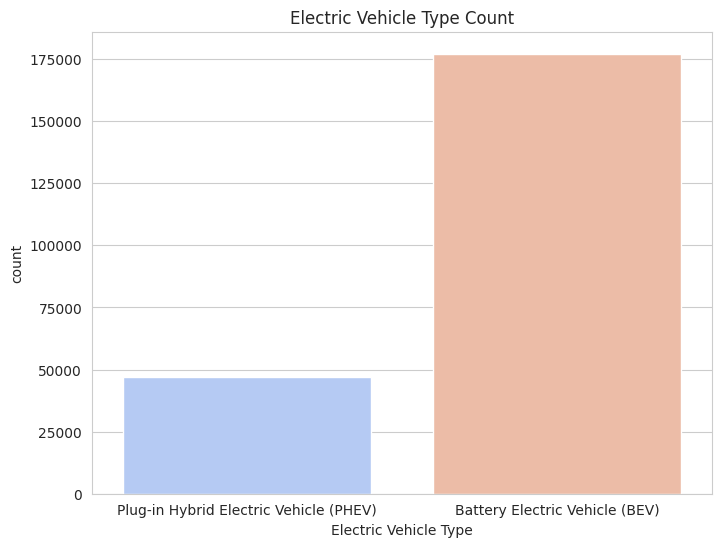

In [26]:
# Count of Electric Vehicle Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Electric Vehicle Type', palette='coolwarm')
plt.title("Electric Vehicle Type Count")
plt.show()

Count of Clean Alternative Fuel Eligibility

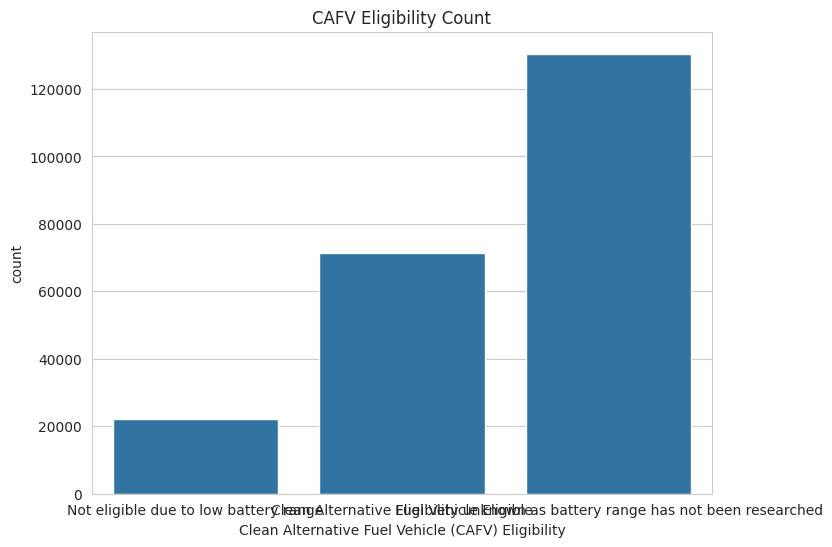

In [27]:
# Count of Clean Alternative Fuel Eligibility
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title("CAFV Eligibility Count")
plt.show()

Top 10 Most Popular EV Brands

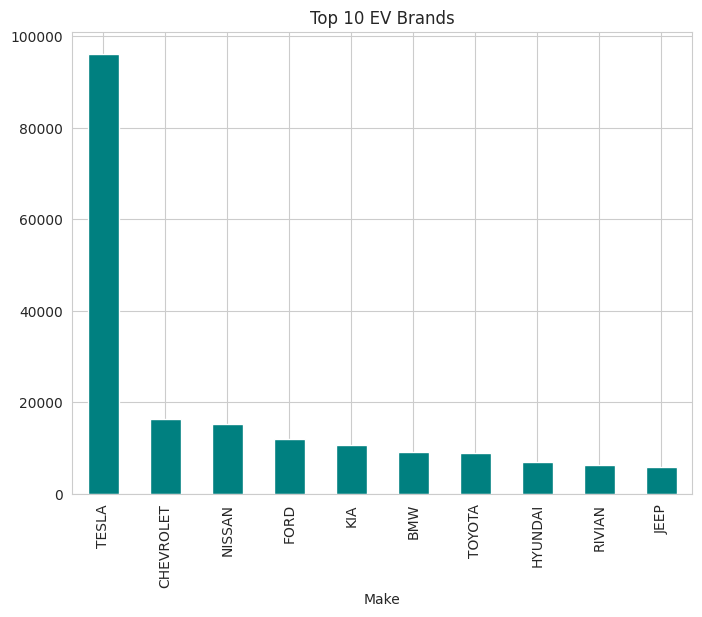

In [28]:
# Top 10 Most Popular EV Brands
plt.figure(figsize=(8, 6))
df['Make'].value_counts().nlargest(10).plot(kind='bar', color='teal')
plt.title("Top 10 EV Brands")
plt.show()

Most Common EV Models

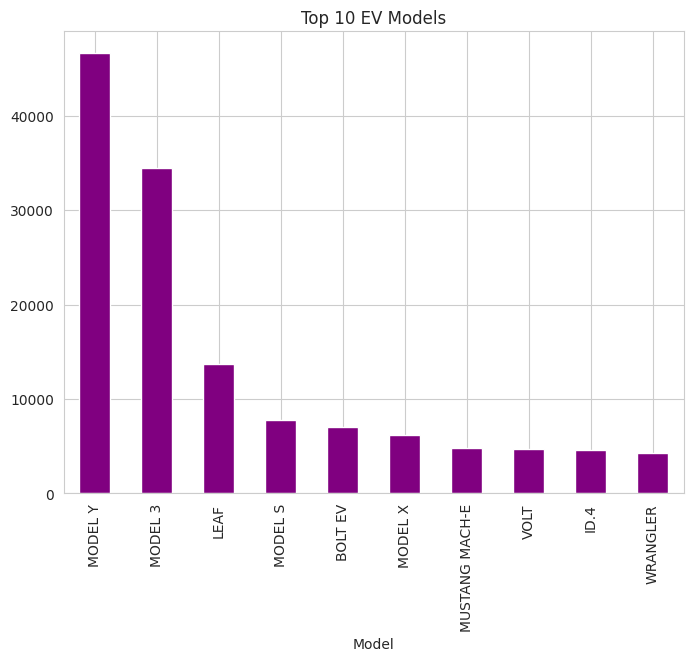

In [30]:
# Most Common EV Models
plt.figure(figsize=(8, 6))
df['Model'].value_counts().nlargest(10).plot(kind='bar', color='purple')
plt.title("Top 10 EV Models")
plt.show()

EV Distribution by County

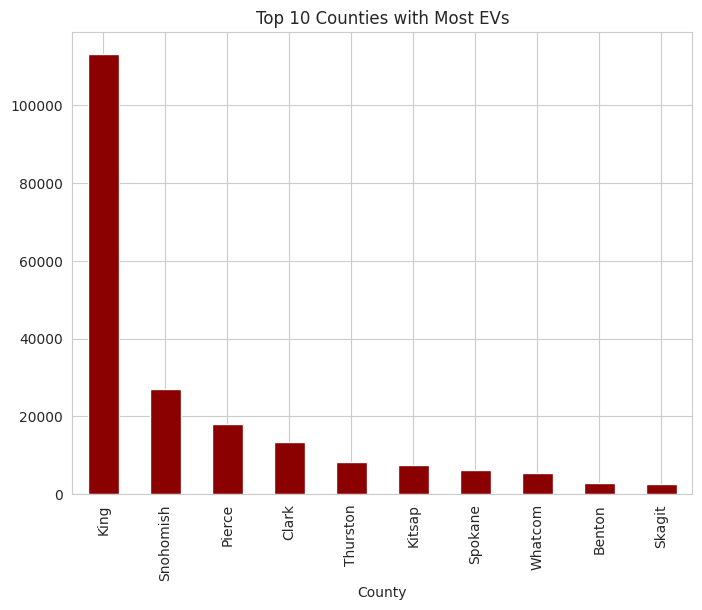

In [31]:
# EV Distribution by County
plt.figure(figsize=(8, 6))
df['County'].value_counts().nlargest(10).plot(kind='bar', color='darkred')
plt.title("Top 10 Counties with Most EVs")
plt.show()

EV Distribution by City

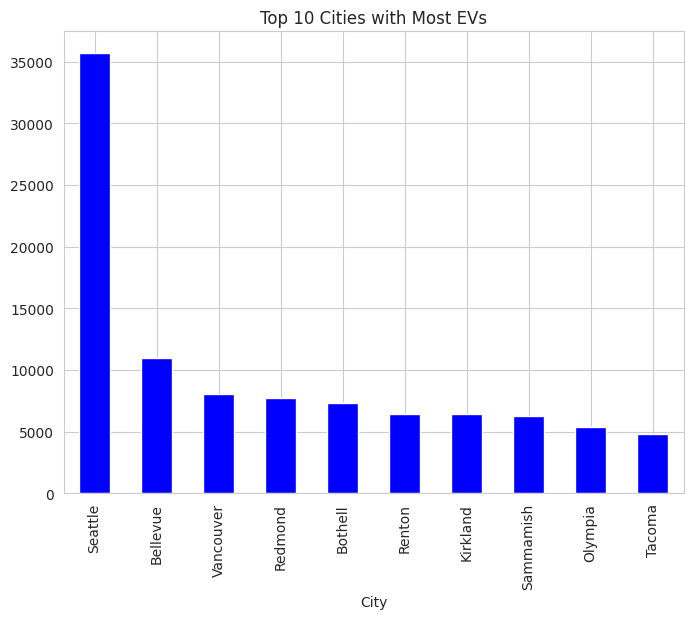

In [32]:
# EV Distribution by City
plt.figure(figsize=(8, 6))
df['City'].value_counts().nlargest(10).plot(kind='bar', color='blue')
plt.title("Top 10 Cities with Most EVs")
plt.show()

Pie Chart for Electric Vehicle Type

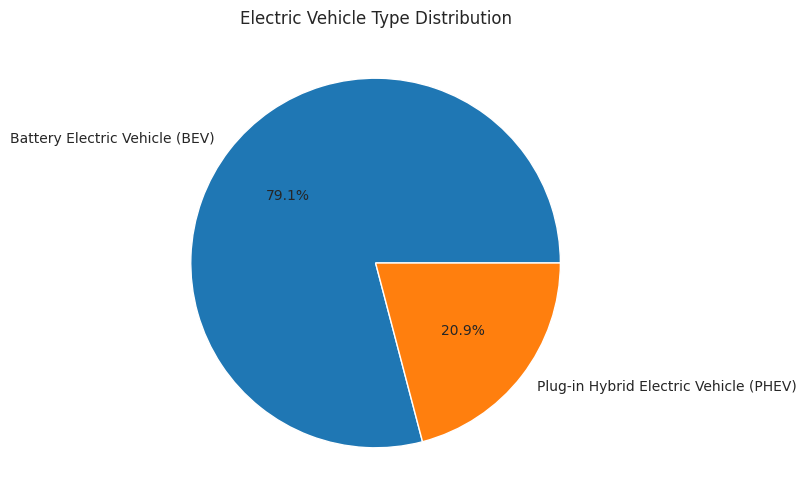

In [33]:
# Pie Chart for Electric Vehicle Type
plt.figure(figsize=(8, 6))
df['Electric Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Electric Vehicle Type Distribution")
plt.ylabel("")  # Hides the default ylabel
plt.show()

Legislative Districts with Most EVs

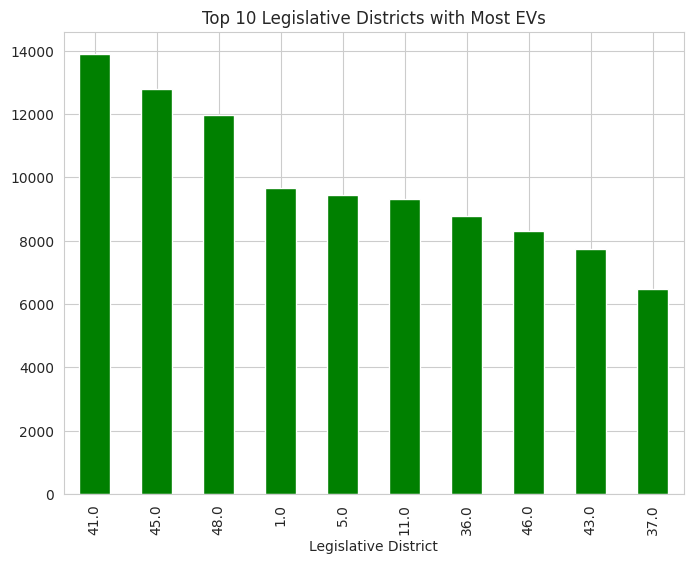

In [34]:
# Legislative Districts with Most EVs
plt.figure(figsize=(8, 6))
df['Legislative District'].value_counts().nlargest(10).plot(kind='bar', color='green')
plt.title("Top 10 Legislative Districts with Most EVs")
plt.show()

Top Electric Utility Providers

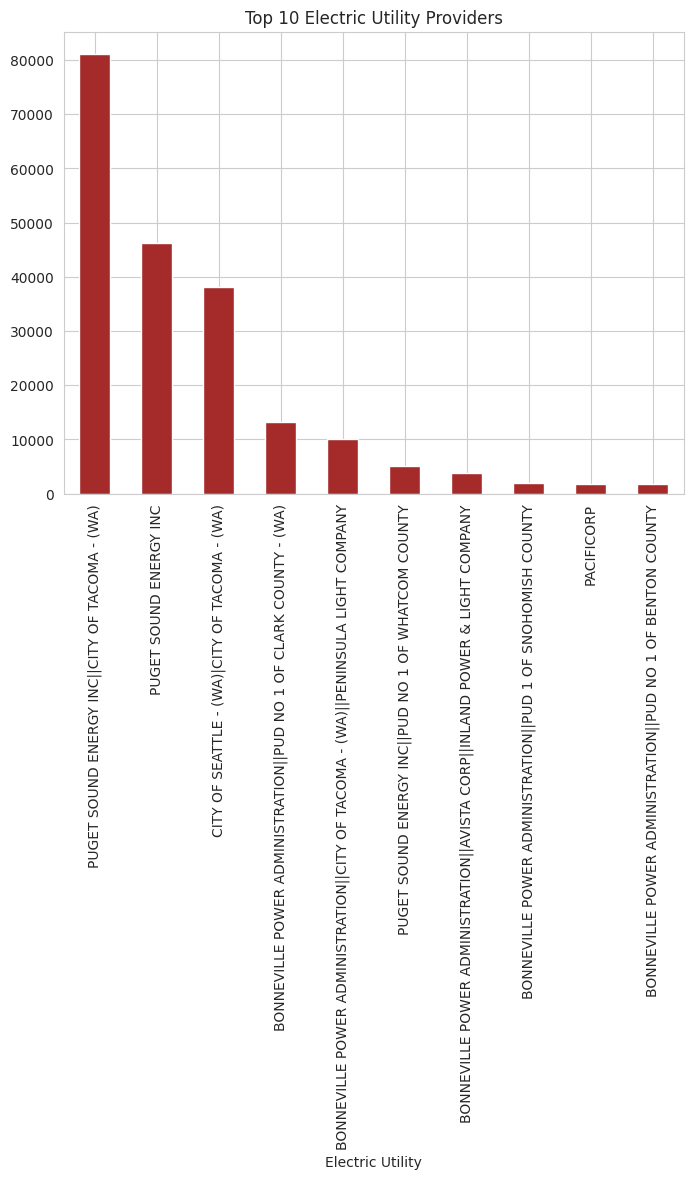

In [35]:
# Top Electric Utility Providers
plt.figure(figsize=(8, 6))
df['Electric Utility'].value_counts().nlargest(10).plot(kind='bar', color='brown')
plt.title("Top 10 Electric Utility Providers")
plt.show()

State Distribution (should be only WA)

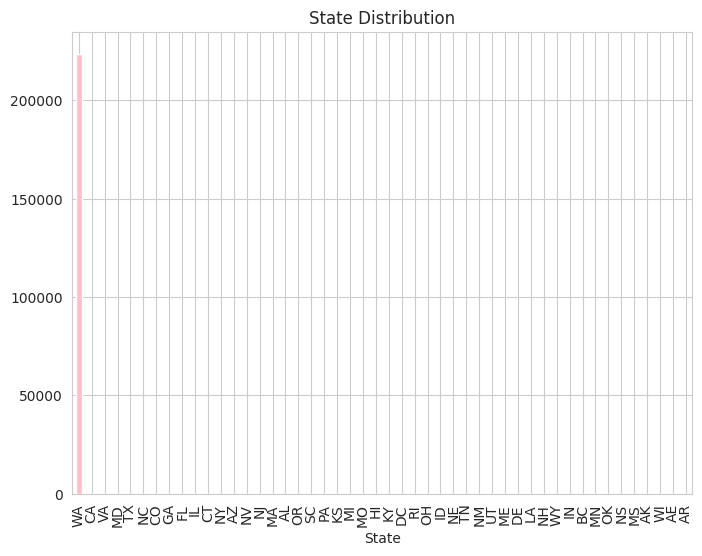

In [36]:
# State Distribution (should be only WA)
plt.figure(figsize=(8, 6))
df['State'].value_counts().plot(kind='bar', color='pink')
plt.title("State Distribution")
plt.show()

Count of Model Year

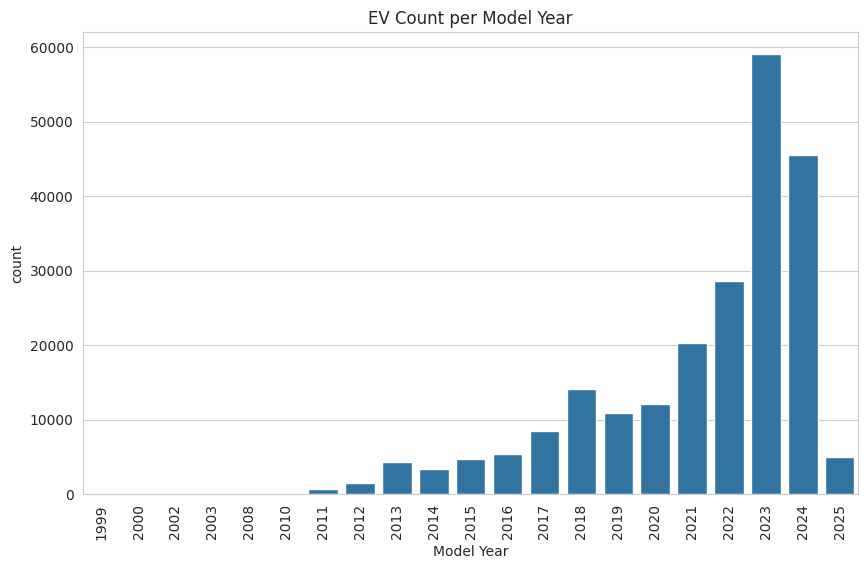

In [37]:
# Count of Model Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Model Year')
plt.title("EV Count per Model Year")
plt.xticks(rotation=90)
plt.show()

Most Common ZIP Codes

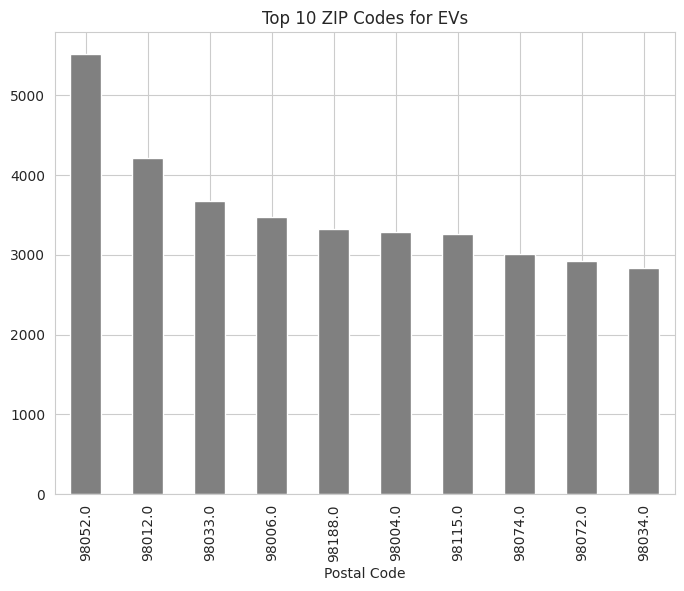

In [38]:
# Most Common ZIP Codes
plt.figure(figsize=(8, 6))
df['Postal Code'].value_counts().nlargest(10).plot(kind='bar', color='gray')
plt.title("Top 10 ZIP Codes for EVs")
plt.show()

Boxplot of MSRP by Vehicle Type

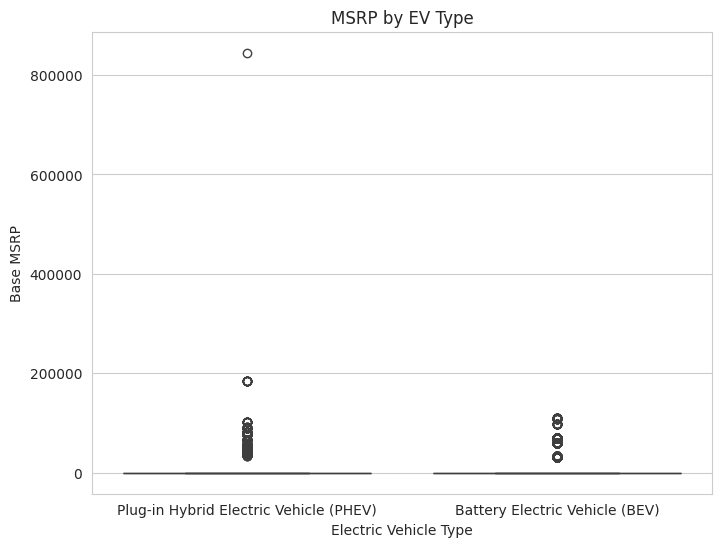

In [39]:
# Boxplot of MSRP by Vehicle Type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Electric Vehicle Type', y='Base MSRP')
plt.title("MSRP by EV Type")
plt.show()

Electric Range by Brand

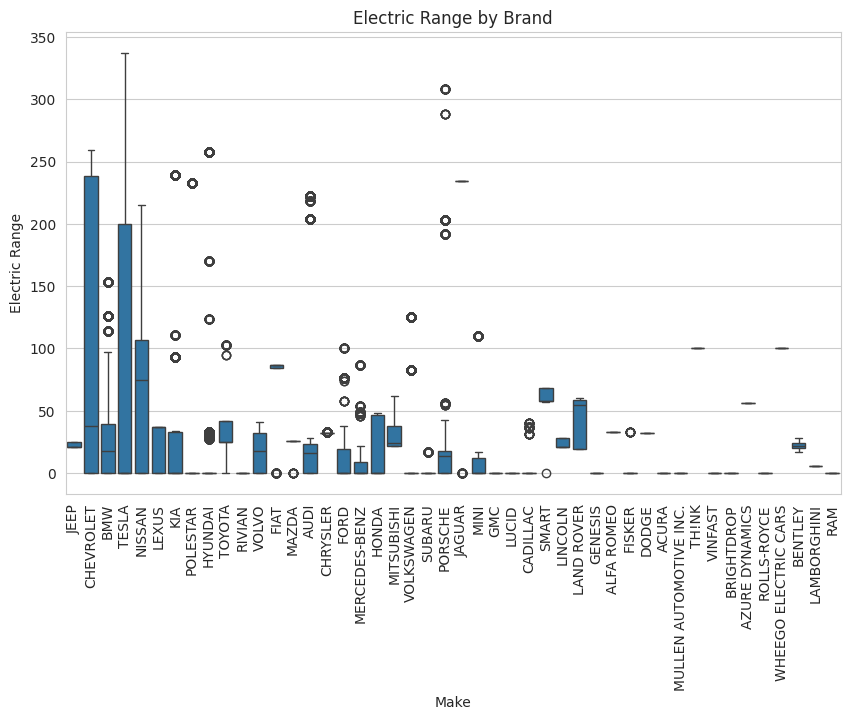

In [40]:
# Electric Range by Brand
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Make', y='Electric Range')
plt.title("Electric Range by Brand")
plt.xticks(rotation=90)
plt.show()

Electric Range by CAFV Eligibility

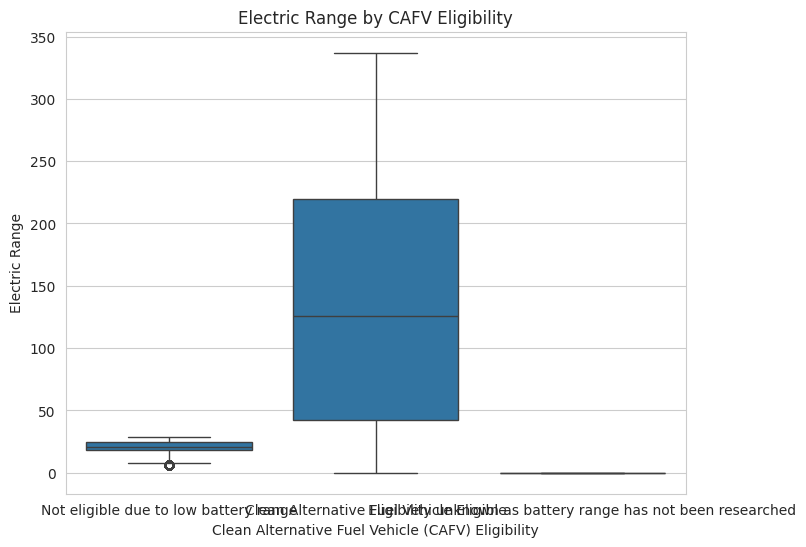

In [41]:
# Electric Range by CAFV Eligibility
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range')
plt.title("Electric Range by CAFV Eligibility")
plt.show()